In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances

#import the dataframe
url = '/Users/G/Desktop/Documents/Formazione in Data Science/WBS/WBS Bootcamp/7. Supervised Machine Learning/Data/housing-iter-0-2/housing-classification-iter-0-2.csv'
data = pd.read_csv(url)

data.sample(5)

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,Expensive
564,13346,NaN,1095,4,1,0,2,0,0,1
1309,7153,NaN,1278,3,0,0,2,112,0,0
330,10624,NaN,1728,6,0,0,1,155,0,0
11,11924,85.0,1175,4,2,0,3,147,0,1
1432,10800,60.0,656,4,0,0,1,0,0,0


## Intuition model

We build a non-Machine Learning solution that operates as a “baseline”.
We will assume that if a house has more than 1 garage and 3 bedrooms it is expensive.

In [3]:
#prepare the ML model

In [4]:
y = data.pop('Expensive')
X = data

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=123)

In [6]:
#intuition model
#when it's more than 1 garage and more thant 3 bedroom = expensive

In [7]:
def dummy(df):
    if df['GarageCars'] > 1 and df['BedroomAbvGr'] > 3:
        return 1
    else:
        return 0

In [7]:
from sklearn.metrics import accuracy_score

#Train

#we now build our models
y_train_pred = X_train.apply(dummy, axis=1)
print(round(accuracy_score(y_true=y_train, y_pred=y_train_pred),2))

#test
y_test_pred = X_test.apply(dummy, axis=1)
print(round(accuracy_score(y_true=y_test, y_pred=y_test_pred),2))


0.81
0.83


Our model has an 81% of accuracy on the training data and 83% on the testing data.

## Decision tree 

In [8]:
# 1. import libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score

# 2. initialize the model (optional: give some parameters)
my_tree = DecisionTreeClassifier(max_depth=4,min_samples_leaf=4)

# 3.0 We import the imputer for dealing with NaN
my_imputer = SimpleImputer().set_output(transform='pandas')
my_imputer.fit(X_train)
X_imputed_train = my_imputer.transform(X_train)

#X_imputed_train.isnull().sum()
# 3. fit the model to the train data
my_tree.fit(X=X_imputed_train, y=y_train)

#4. Make predictions and check the accuracy
#TRAIN
y_pred_tree_train = my_tree.predict(X_imputed_train)
print(f"Accuracy for training is: {accuracy_score(y_true = y_train,y_pred = y_pred_tree_train)}")

#5. TEST
X_imputed_test = my_imputer.transform(X_test)
y_pred_tree_test = my_tree.predict(X_imputed_test)
print(f"Accuracy for testing is: {accuracy_score(y_true = y_test,y_pred = y_pred_tree_test)}")


Accuracy for training is: 0.9306506849315068
Accuracy for testing is: 0.9315068493150684


### Plotting the tree

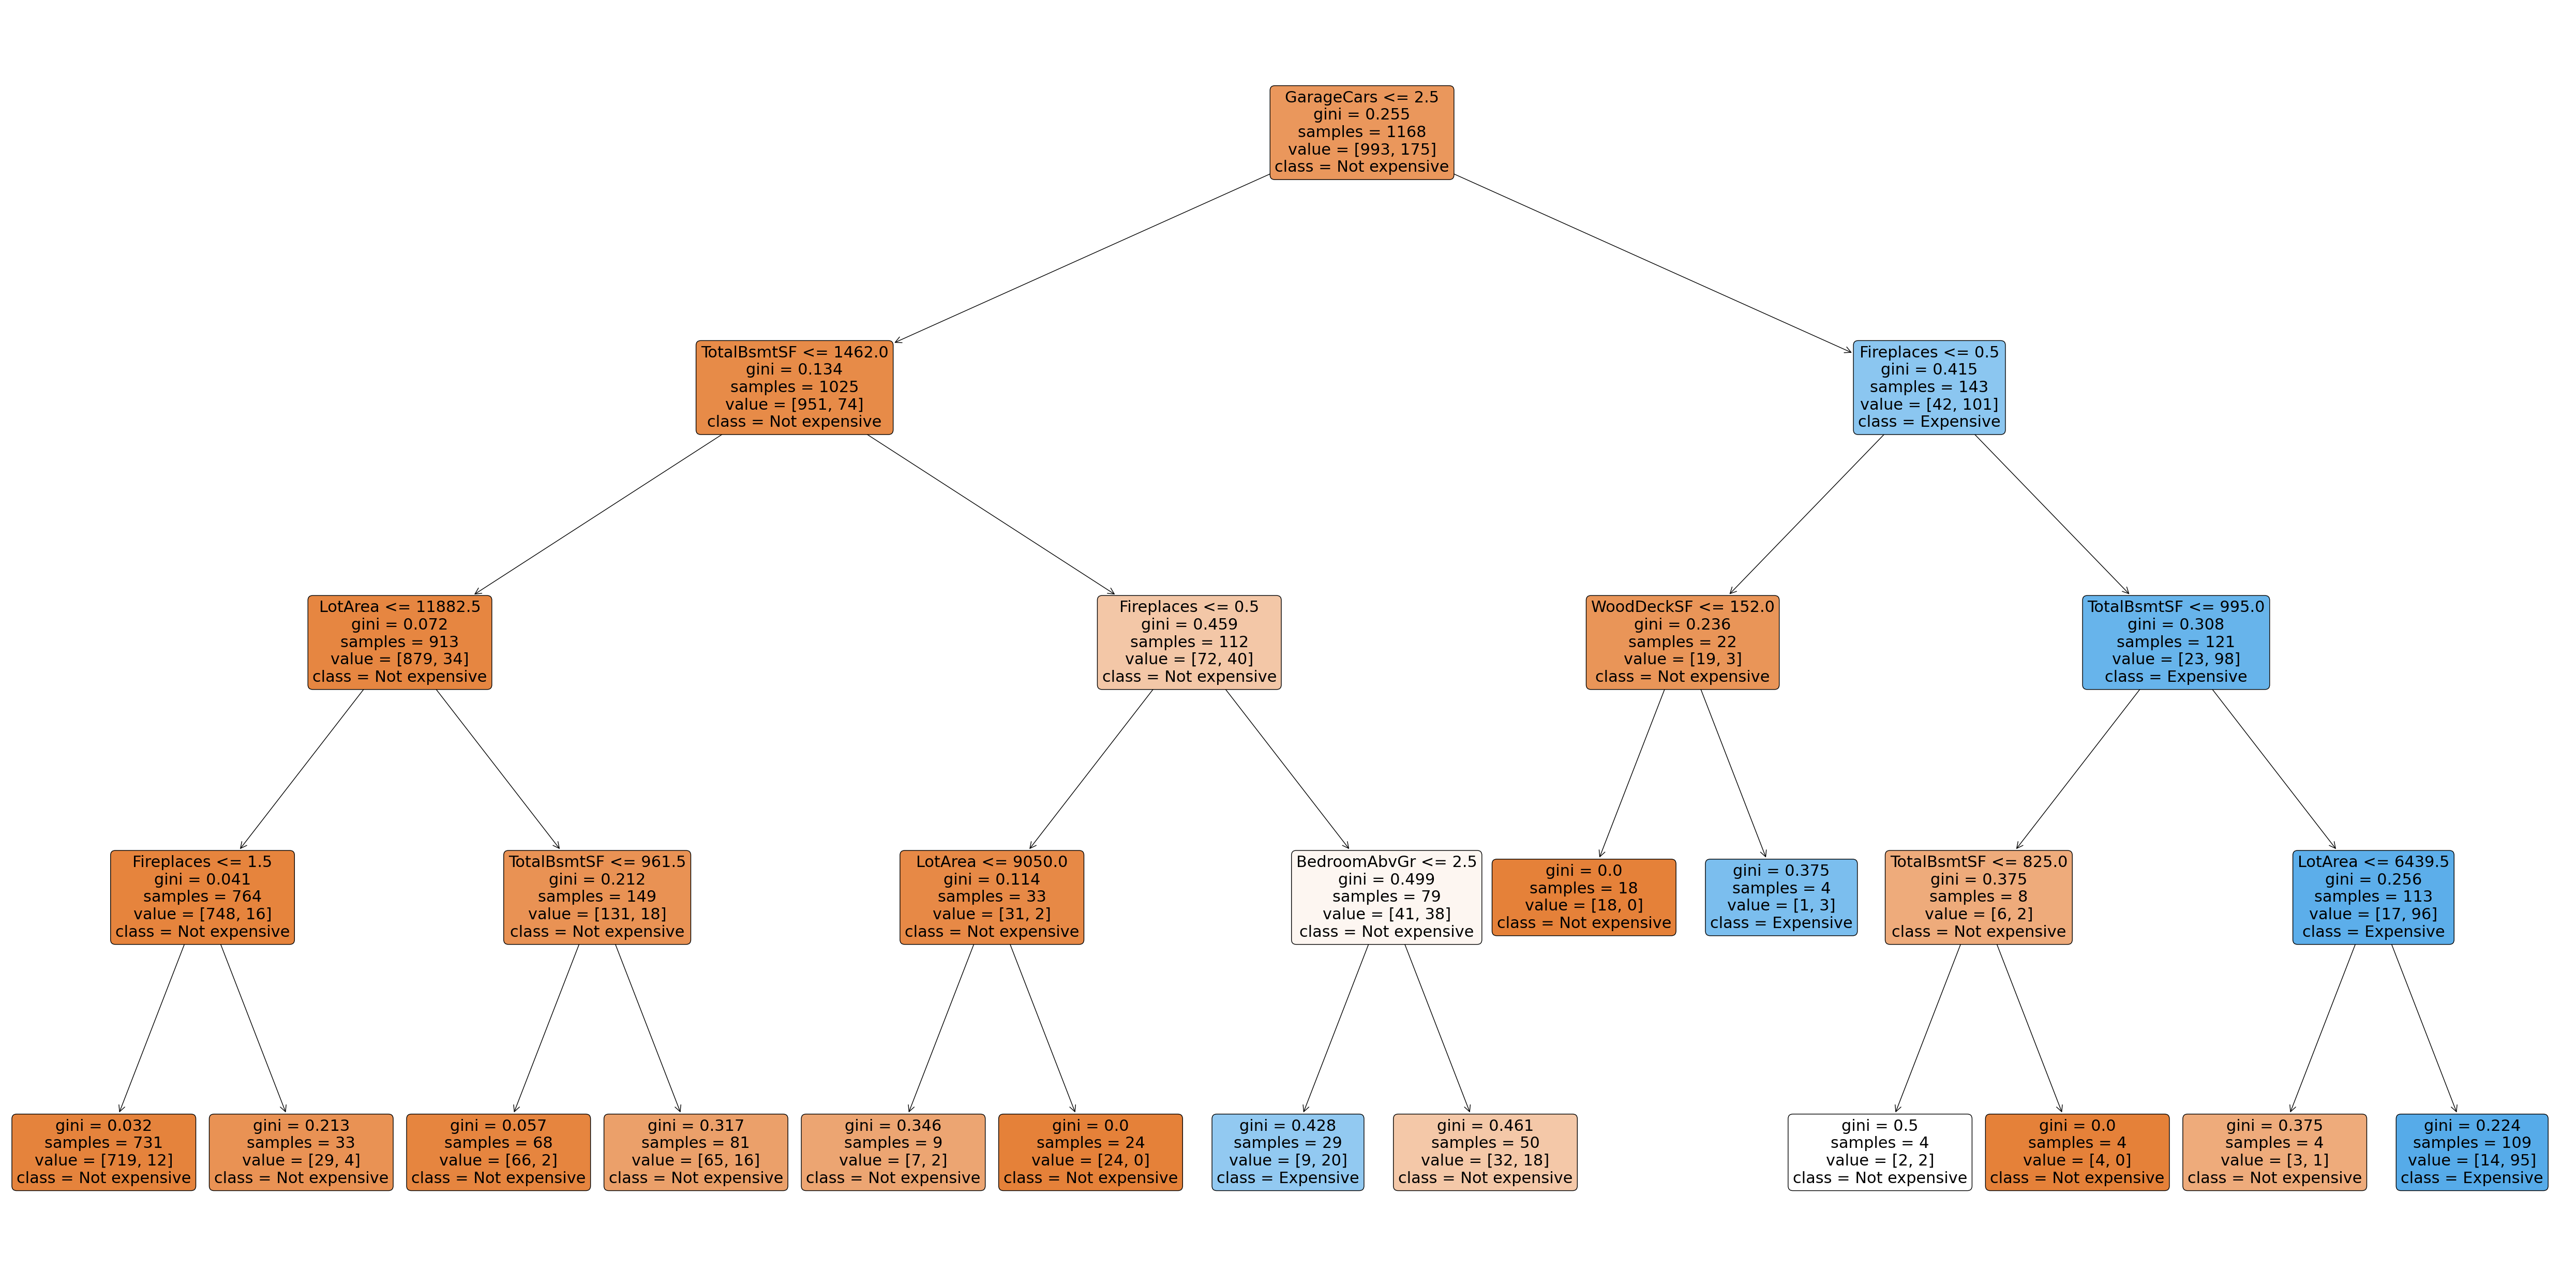

In [9]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(64, 32))

plot_tree(
     my_tree,
     filled=True, 
     rounded=True, 
     class_names=['Not expensive','Expensive'], 
     feature_names=X_train.columns
     );

## Use GridSearchCV to find the best parameters of the model

To define GridSearchCV we need:
* The model
* The parameter grid
* The number of folds
* The scoring
* the verbosity level

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

#Re-import and prapare the data
url = '/Users/G/Desktop/Documents/Formazione in Data Science/WBS/WBS Bootcamp/7. Supervised Machine Learning/Data/housing-iter-0-2/housing-classification-iter-0-2.csv'
data = pd.read_csv(url)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=123)

my_imputer = SimpleImputer().set_output(transform='pandas') 
my_imputer.fit(X_train)
X_imputed_train = my_imputer.transform(X_train) 
X_imputed_test = my_imputer.transform(X_test)

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#initialize model without specifying the parameters
dtree = DecisionTreeClassifier()

#parameter greed
param_grid = {
    'max_depth': range(2, 12),
    'min_samples_leaf': range(3, 10, 2),
    'min_samples_split': range(3, 40, 5),
    'criterion':['gini', 'entropy']
    }

search = GridSearchCV(dtree, # you have defined this beforehand
                      param_grid, # your parameter grid
                      cv=5, # the value for K in K-fold Cross Validation
                      scoring='accuracy', # the performance metric to use, 
                      verbose=0) # we don't want informative outputs during the training process

random_search = RandomizedSearchCV(dtree, 
                      param_grid, 
                      cv=5, 
                      scoring='accuracy', 
                      verbose=0,
                      n_iter=50) # we want informative outputs during the training process

#we train the model with the training data
search.fit(X_imputed_train, y_train)
random_search.fit(X_imputed_train, y_train)

print(f"The best parameters are {search.best_params_} and {random_search.best_params_} for random")
print("")
print(f"The average accuracy is {search.best_score_} and {random_search.best_score_} for random")

# training accuracy
y_train_pred = search.predict(X_imputed_train)
y_train_pred_random = random_search.predict(X_imputed_train)
print(f"The training accuracy is {accuracy_score(y_train, y_train_pred)} and {accuracy_score(y_train, y_train_pred_random)} for random")

# testing accuracy
y_test_pred = search.predict(X_imputed_test)
y_test_pred_random = random_search.predict(X_imputed_test)
print(f"The testing accuracy is {accuracy_score(y_test, y_test_pred)} and {accuracy_score(y_test, y_test_pred_random)} for random")

The best parameters are {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 3, 'min_samples_split': 33} and {'min_samples_split': 33, 'min_samples_leaf': 3, 'max_depth': 6, 'criterion': 'entropy'} for random

The average accuracy is 0.9255236418326547 and 0.9255236418326547 for random
The training accuracy is 0.9392123287671232 and 0.9392123287671232 for random
The testing accuracy is 0.9212328767123288 and 0.9212328767123288 for random


## Pipeline creation

Tool to compress all the steps in the data preparation & modelling phases into a single one.

**Structure**:
Pipeline([("imputer", imputer), ("classifier",dtree)]).set_output(transform='pandas')

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import set_config

#Initialize transformer and model¶
imputer = SimpleImputer(strategy="median")
my_scaler = StandardScaler()
dtree = DecisionTreeClassifier(max_depth=4,
                               min_samples_leaf=10, 
                               random_state=42)

#Create a pipeline
pipe = Pipeline([("imputer", imputer), ("scalre",my_scaler) , ("model", dtree)]).set_output(transform='pandas')

#Config the type of output
set_config(display="diagram")

#Fit the pipeline to the training data
pipe.fit(X_train, y_train)

#Use the pipeline to make predictions
pipe.predict(X_train)
pipe.predict(X_test)

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

## Use GridSearchCV to find the best parameters of the pipeline

In [12]:
from sklearn.pipeline import make_pipeline

# initialize transformers & model
imputer = SimpleImputer()
scaler = StandardScaler()
dtree = DecisionTreeClassifier()

# create the pipeline
pipe = make_pipeline(imputer,
                     scaler,
                     dtree).set_output(transform='pandas')

# create parameter grid
param_grid = {
    "simpleimputer__strategy":["mean", "median"],
    "standardscaler__with_mean":[True, False],
    "standardscaler__with_std":[True, False],
    "decisiontreeclassifier__max_depth": range(2, 14),
    "decisiontreeclassifier__min_samples_leaf": range(3, 10),
    "decisiontreeclassifier__criterion":["gini", "entropy"]
}

# define cross validation
search = GridSearchCV(pipe,
                      param_grid,
                      cv=10,
                      verbose=0)

# fit
search.fit(X_train, y_train)

print(f"The best parameters are {search.best_params_}")
print("")
print(f"The average accuracy is {search.best_score_}")

# training accuracy
#below we use X_train and not X_train_imputed because imputing is
#built in the pipeline
print(f"The training accuracy is {accuracy_score(y_train, search.predict(X_train))}")

# testing accuracy
print(f"The testing accuracy is {accuracy_score(y_test, search.predict(X_test))}")

NameError: name 'StandardScaler' is not defined